**Complete the details below:**<br>


### Name: Elan van Biljon


#### Student Number: 18384439

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from utils import plot_confusion_matrix
from utils import nearest_feature as nf

### Generate training data

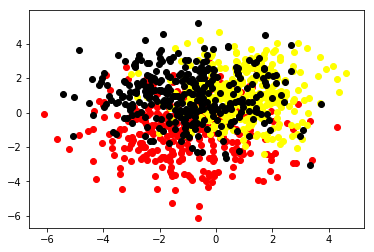

In [4]:
# Training data - two randomly-generated
# Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1], ])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])
X = X.T
# Plot the data
plt.figure('equal')
for label, color in zip([0, 1, 2], ['red', 'yellow', 'black']):
    plt.scatter(X[label == y, 0], X[label == y, 1], color=color)
plt.show()

#### Display the data that you generated to find something like the following:

**Marks: 1**

In [5]:
display(Image(filename='./images/wm_dat1.png'))

## Fit the training data to the scikit-learn logistic regression classifier

The image above shows that there is considerable overlap between the classes. Use your trained classifier to assign all the training data to different classes.

**Print the confusion matrix and also plot it, to get something like the image below:**

**Marks: 1**

http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

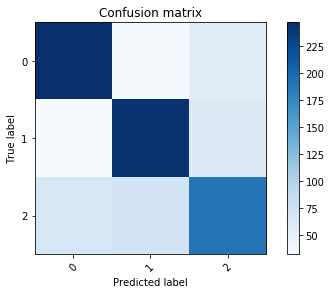

In [6]:
# Train the classisfier
classifier = logis(C=1e5, solver='lbfgs', multi_class='multinomial')
classifier.fit(X, y);

# classify the data and print the confusion matrix
pr_labels=classifier.predict(X)
cm = confusion_matrix(y, pr_labels)
plt.figure()
plot_confusion_matrix(
    cm,
    target_names=np.array(['0','1','2'],
                          dtype='<U10'))

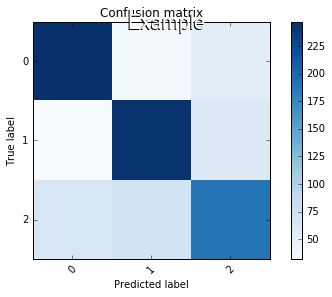

In [7]:
display(Image(filename='./images/wm_confusion.png'))

### Now plot the different classes as predicted by your system. You should get something like: 

**Can you tell from the graph that this is a *linear* classifier?**

**Marks: 1 **

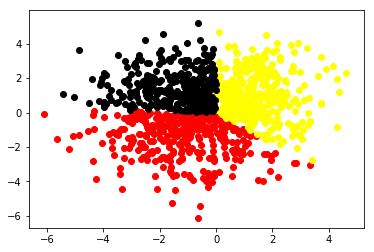

In [8]:
# Plot the data
plt.figure('equal')
for label, color in zip([0, 1, 2], ['red', 'yellow', 'black']):
    plt.scatter(X[label == pr_labels, 0], X[label == pr_labels, 1], color=color)
plt.show()

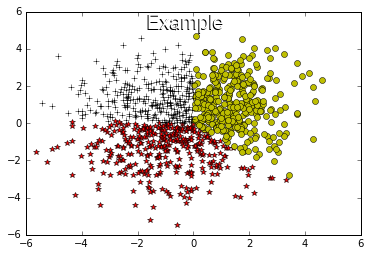

In [9]:
display(Image(filename='./images/wm_dat2.png'))

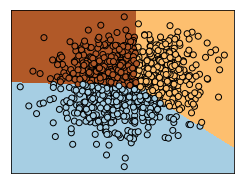

In [10]:
# Create the mesh of class regions (used to display decision boundry)
step_size = 0.01
# Find the dimensions of the required mesh
# (with small offset for better visualization)
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5
# Create the mesh
x_axis = np.arange(x_min, x_max, step_size)
y_axis = np.arange(y_min, y_max, step_size)
x_axies, y_axies = np.meshgrid(x_axis, y_axis)

# Find the nearest features to each x and y coord
# ie find which mean is closest to each coord
# and thus what class this coord belongs to
Z = classifier.predict(np.c_[x_axies.ravel(), y_axies.ravel()])
Z = Z.reshape(y_axies.shape)

# Plot the class seperation on a color map
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(x_axies, y_axies, Z, cmap=plt.cm.Paired)

# Plot the training data too
plt.scatter(X[:, 0], X[:, 1],
            c=pr_labels, edgecolors='k',
            cmap=plt.cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

** Before continuing in the notebook, you will need to install the `lasagne` Python module with "pip3 install --user lasagne" **

# Now classify the MNIST digits

The MNIST database provided in the assignment resources consists of low-resolution (28x28) grayscale images of handwritten digits ($0,1,2,3,4,5,6,7,8,9$). First, you read in a set of training digits and display them interactively to get an idea what they look like. Afterwards, you build and train a softmax classifier using scitkit image. You will then classify the digits in the test set and display the results. Finally, you will display the weights as images.

First load the dataset - for more information about the dataset, see http://yann.lecun.com/exdb/mnist/.

In [23]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

# Display the test digits interactively.

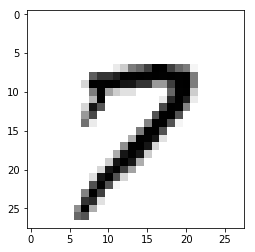

In [24]:
from ipywidgets import interact

def show_digits(k=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[k][0], cmap=plt.cm.binary)   
    
    plt.show()
    
w = interact(show_digits, k =(0, 1000)) 


# Train the softmax classifier

**Using the training set, build a softmax classifier. Use this classifier to classify the digits in the training set and the test set separately. Print the confusion matrix and also display it as an image for each case to get something like:**

**Marks: 2**

[[4809    1   13    7   10   26   30    2   29    5]
 [   1 5548   24   17    3   19    4   11   43    8]
 [  24   50 4546   73   49   23   43   43   99   18]
 [  10   20  101 4644    7  143   11   39   93   33]
 [   7   16   24    7 4569    7   43   19   29  138]
 [  40   15   37  109   40 4059   62   14   99   31]
 [  25   10   27    1   31   55 4775    5   19    3]
 [   8   14   55   19   35   12    4 4883   13  132]
 [  24   74   53  115   19  113   34    9 4357   44]
 [  15   24   12   58  101   28    2  120   38 4590]]


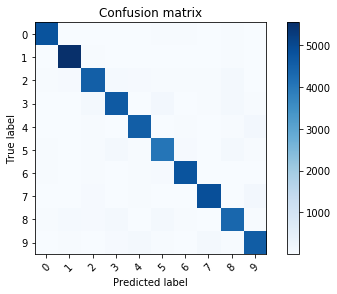

In [13]:
# Reshape the data so that it can be fed into the classifier
X_shape = X_train.shape
X_train = X_train.reshape((X_shape[0], -1))

# Train the classisfier
classifier = logis(C=X_shape[0], solver='lbfgs', multi_class='multinomial')
classifier.fit(X_train, y_train);

# classify the data and print the confusion matrix
pr_labels = classifier.predict(X_train)
cm = confusion_matrix(y_train, pr_labels)
print(cm)
plt.figure()
plot_confusion_matrix(
    cm,
    target_names=np.array(np.arange(10),
                          dtype='<U10'))

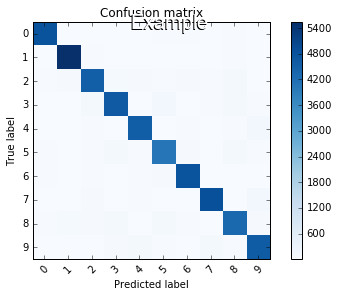

In [14]:
display(Image(filename='./images/wm_confusion2.png'))

### Accuracy

**Calculate the accuracy of your system as a fraction of the correctly classified digits. You should get something like 0.9254.**

**Marks: 1**

In [15]:
X_test = X_test.reshape((X_test.shape[0], -1))
pr_labels_test = classifier.predict(X_test)
total = np.sum(pr_labels_test == y_test)
print(total/X_test.shape[0])

0.9248


# Extracting the weights and display as images.

**Extract the weights of the softmax classifier and display them as images. Each set of weights should correspond to a specific digit. You should get something like:**

**Marks: 2**

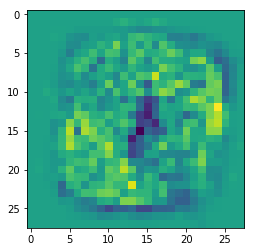

<function __main__.show_calculated_weigts>

In [16]:
def show_calculated_weigts(k=0):
    weights = classifier.coef_[k].reshape((28, -1))
    plt.imshow(weights, cmap=plt.cm.viridis)
    plt.show()

interact(show_calculated_weigts, k = (0, 9))

In [17]:
from skimage import io
ic = io.ImageCollection('./wm_softmax_mnist_weights/*.png')
def show_weights(k=0):
    plt.imshow(ic[k], cmap=plt.cm.viridis)
    plt.show()

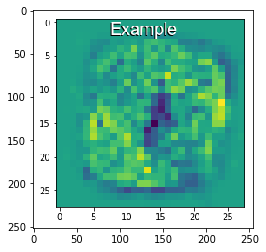

In [18]:
w = interact(show_weights, k =(0, 9)) 

As a comparison, here you can see what the weights look like if you train the softmax classifier using tensorflow (a library dedicated to neural networks and deep learning).

In [19]:
ic_tensor = io.ImageCollection('./wm_tensor_mnist_weights/*.png')
def show_weights_tensor(k=0):
    plt.imshow(ic_tensor[k], cmap=plt.cm.viridis)
    plt.show()

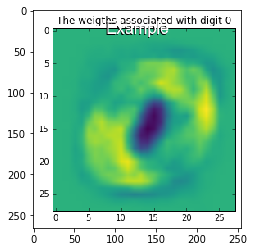

In [20]:
w = interact(show_weights_tensor, k =(0, 9)) 

## Further investigation

**Fit the logistic regression classifier for different values of the regularization parameter - we recommend values evenly spaced on the log scale - and show the corresponding weight images for some digit as the parameter changes.  Explain the changes in the weight images observed.**

**(Insert cells above the plagiarism declaration for this.)**

**Marks: 2**

In [21]:
start = -10
stop = 10

# classifiers = []
weights = []
for i in np.linspace(start=start, stop=stop, num=stop-start+1):
    # Train the classisfier
    print(i)
    classifier = logis(C=np.power(10, i), solver='lbfgs', multi_class='multinomial')
    classifier.fit(X_train, y_train);
#     classifiers.append(classifier)
    weights.append(classifier.coef_[0].reshape((28, -1)))
    
print('Done!')

-10.0
-9.0
-8.0


KeyboardInterrupt: 

In [ ]:
# Regularization coefficient variation
def show_weights_regularization(k=5):
    # retrieve the waits for the zero
    plt.imshow(weights[k-1+start], cmap=plt.cm.viridis)
    plt.show()
    
interact(show_weights_regularization, k=(start, stop));

# Plagiarism declaration

** Add the plagiarism declaration from the University's Plagiarism Policy in this cell.**